In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results = pd.read_csv("generated_results.csv")
results.head()

,description,target_query,checkpoint_name,generated_output,rouge1,rouge2,rougeL,rougeLsum
0,"{'keywords': ['Amberta', '18K Gold Plated', 'S...",Amberta Gold Plated Figaro Chain Necklace,checkpoint-99855,Amberta Figaro Chain Necklace,80.00,50.00,80.00,80.00
1,"{'keywords': ['Amberta', '18K Gold Plated', 'S...",Amberta Gold Plated Figaro Chain Necklace,query-gen-msmarco-t5-base-v1,what is figaro chain,40.00,25.00,40.00,40.00
2,"{'keywords': ['FitFlop, sandals, Lulu, python ...",FitFlop Lulu Python Flip-Flop,checkpoint-99855,FitFlop Women's Lulu Flip-Flop,72.73,22.22,72.73,72.73
3,"{'keywords': ['FitFlop, sandals, Lulu, python ...",FitFlop Lulu Python Flip-Flop,query-gen-msmarco-t5-base-v1,what is lulu python print,40.00,25.00,40.00,40.00
4,"{'keywords': ['Clarks', ""women's slippers"", 'w...",Clarks Women's Wool Felt House Slippers,checkpoint-99855,Clarks Women's Slippers,72.73,44.44,72.73,72.73


In [3]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   description       1000 non-null   object 
 1   target_query      996 non-null    object 
 2   checkpoint_name   1000 non-null   object 
 3   generated_output  1000 non-null   object 
 4   rouge1            1000 non-null   float64
 5   rouge2            1000 non-null   float64
 6   rougeL            1000 non-null   float64
 7   rougeLsum         1000 non-null   float64
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


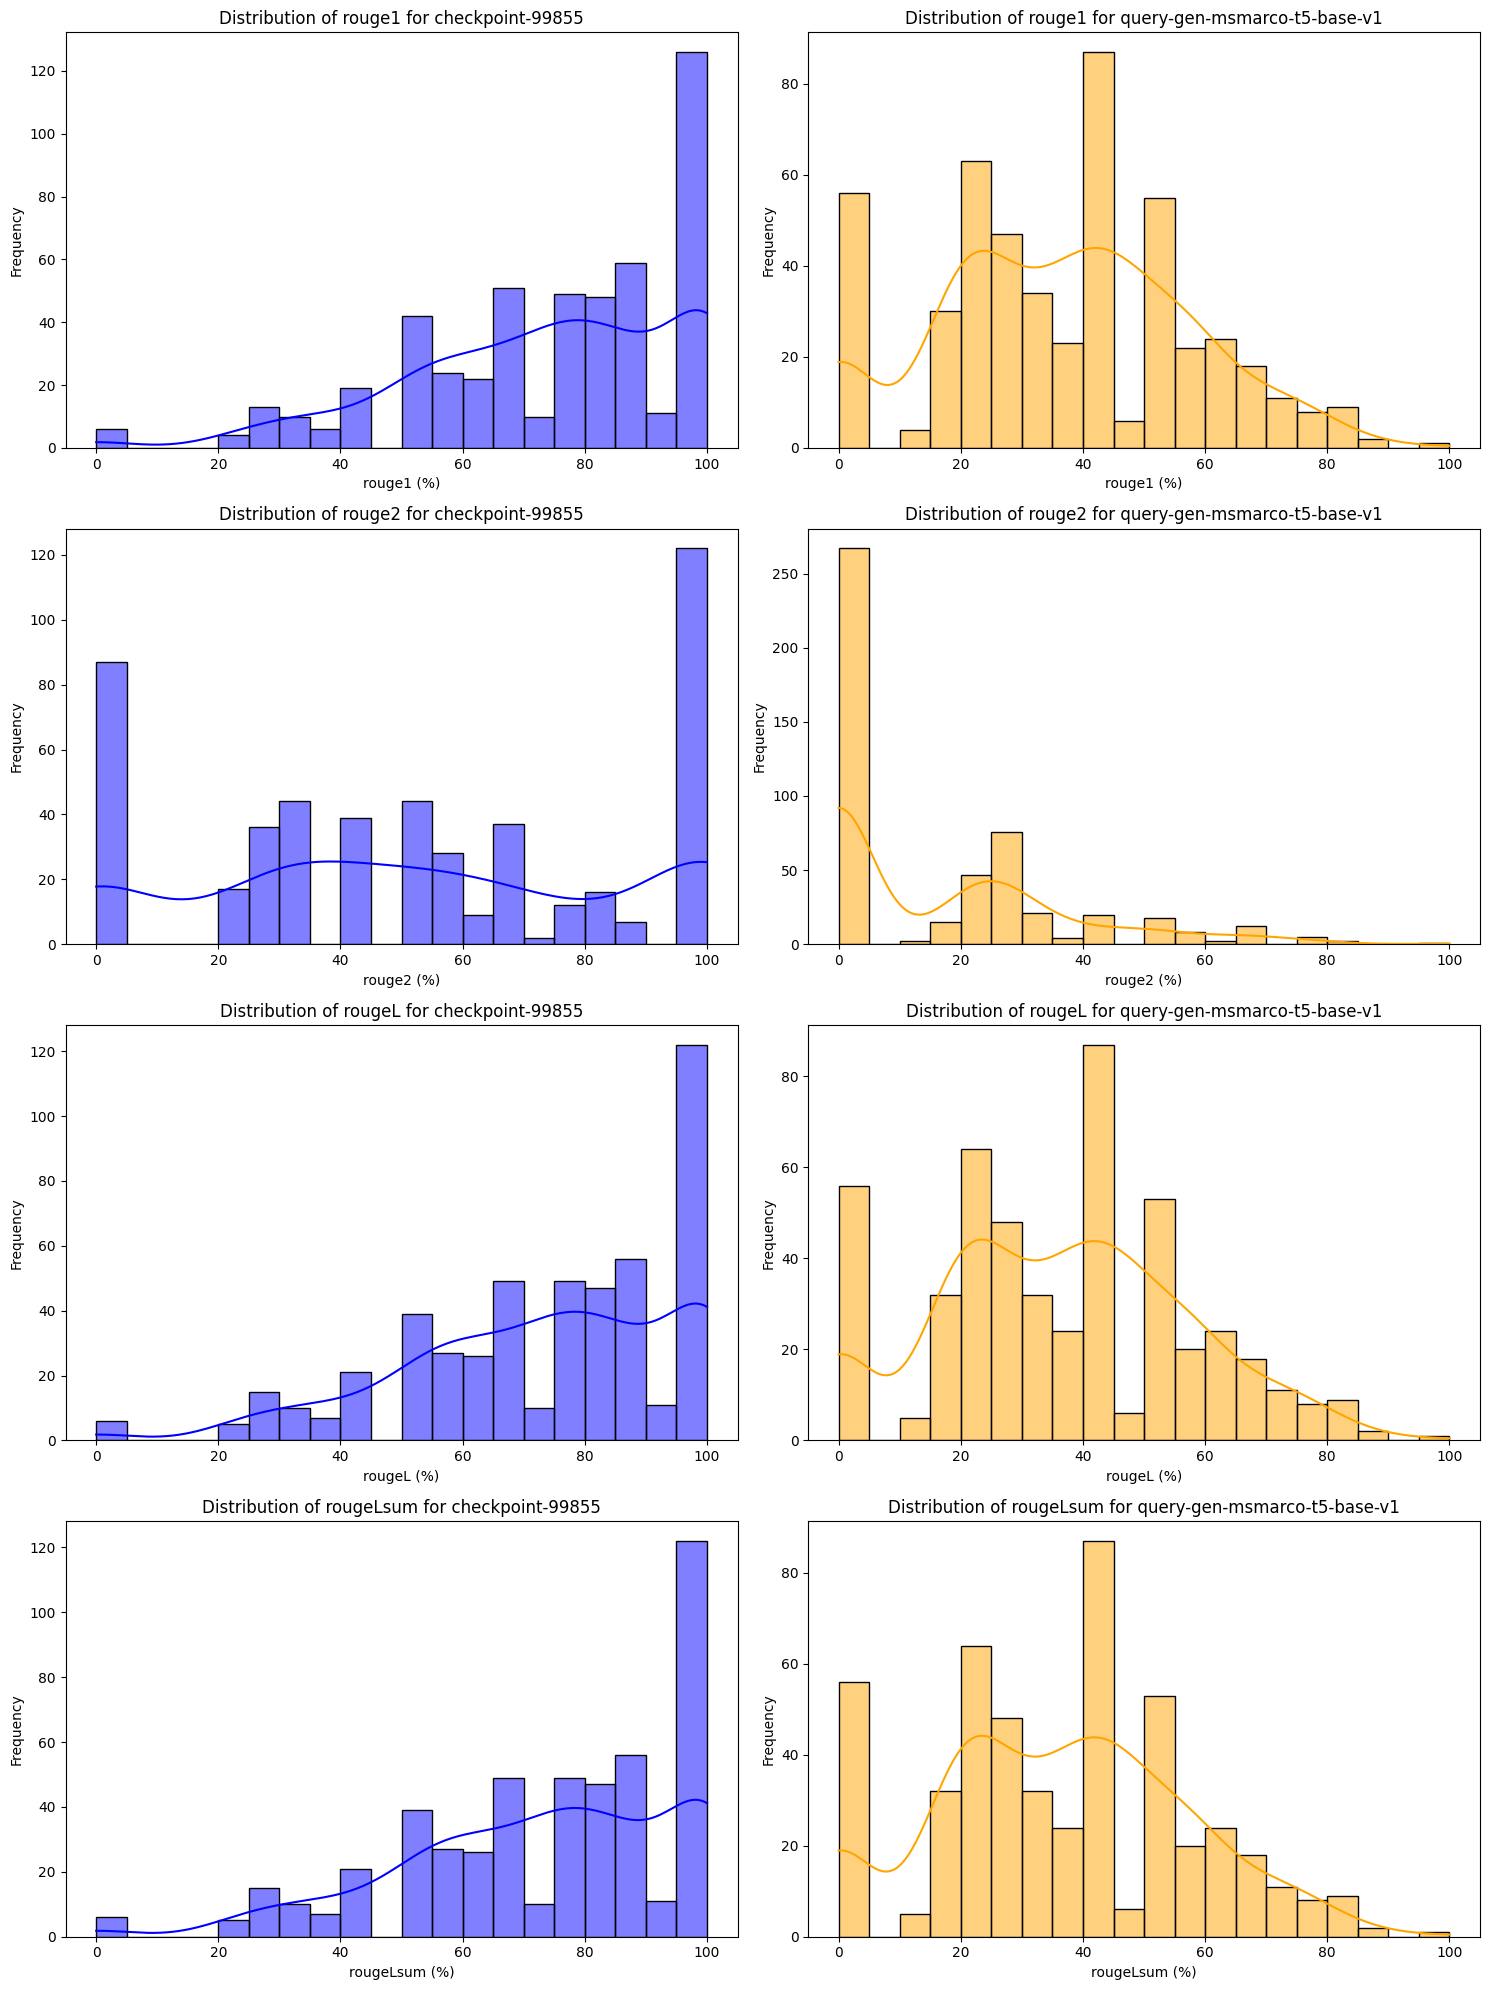

In [5]:
def plot_scores_distribution(data, score_columns):
    """
    Plots the distribution of ROUGE scores for rows where checkpoint_name is either 'checkpoint-99855' or 'query-gen-msmarco-t5-base-v1'.

    Parameters:
        data (DataFrame): The dataset containing ROUGE scores.
        score_columns (list): List of column names for ROUGE scores.

    Returns:
        None: Displays the plots.
    """
    # Filter data for each checkpoint_name
    fine_tuned_data = data[data['checkpoint_name'] == 'checkpoint-99855']
    original_data = data[data['checkpoint_name'] == 'query-gen-msmarco-t5-base-v1']

    plt.figure(figsize=(15, 20))
    
    # Iterate over each ROUGE score column to create subplots for both models
    for i, score in enumerate(score_columns, 1):
        plt.subplot(4, 2, 2 * i - 1)
        sns.histplot(fine_tuned_data[score], kde=True, bins=20, color='blue', edgecolor='black')
        plt.title(f'Distribution of {score} for checkpoint-99855')
        plt.xlabel(f'{score} (%)')
        plt.ylabel('Frequency')

        plt.subplot(4, 2, 2 * i)
        sns.histplot(original_data[score], kde=True, bins=20, color='orange', edgecolor='black')
        plt.title(f'Distribution of {score} for query-gen-msmarco-t5-base-v1')
        plt.xlabel(f'{score} (%)')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Example usage
score_columns = ['rouge1', 'rouge2', 'rougeL', 'rougeLsum']
plot_scores_distribution(results, score_columns)


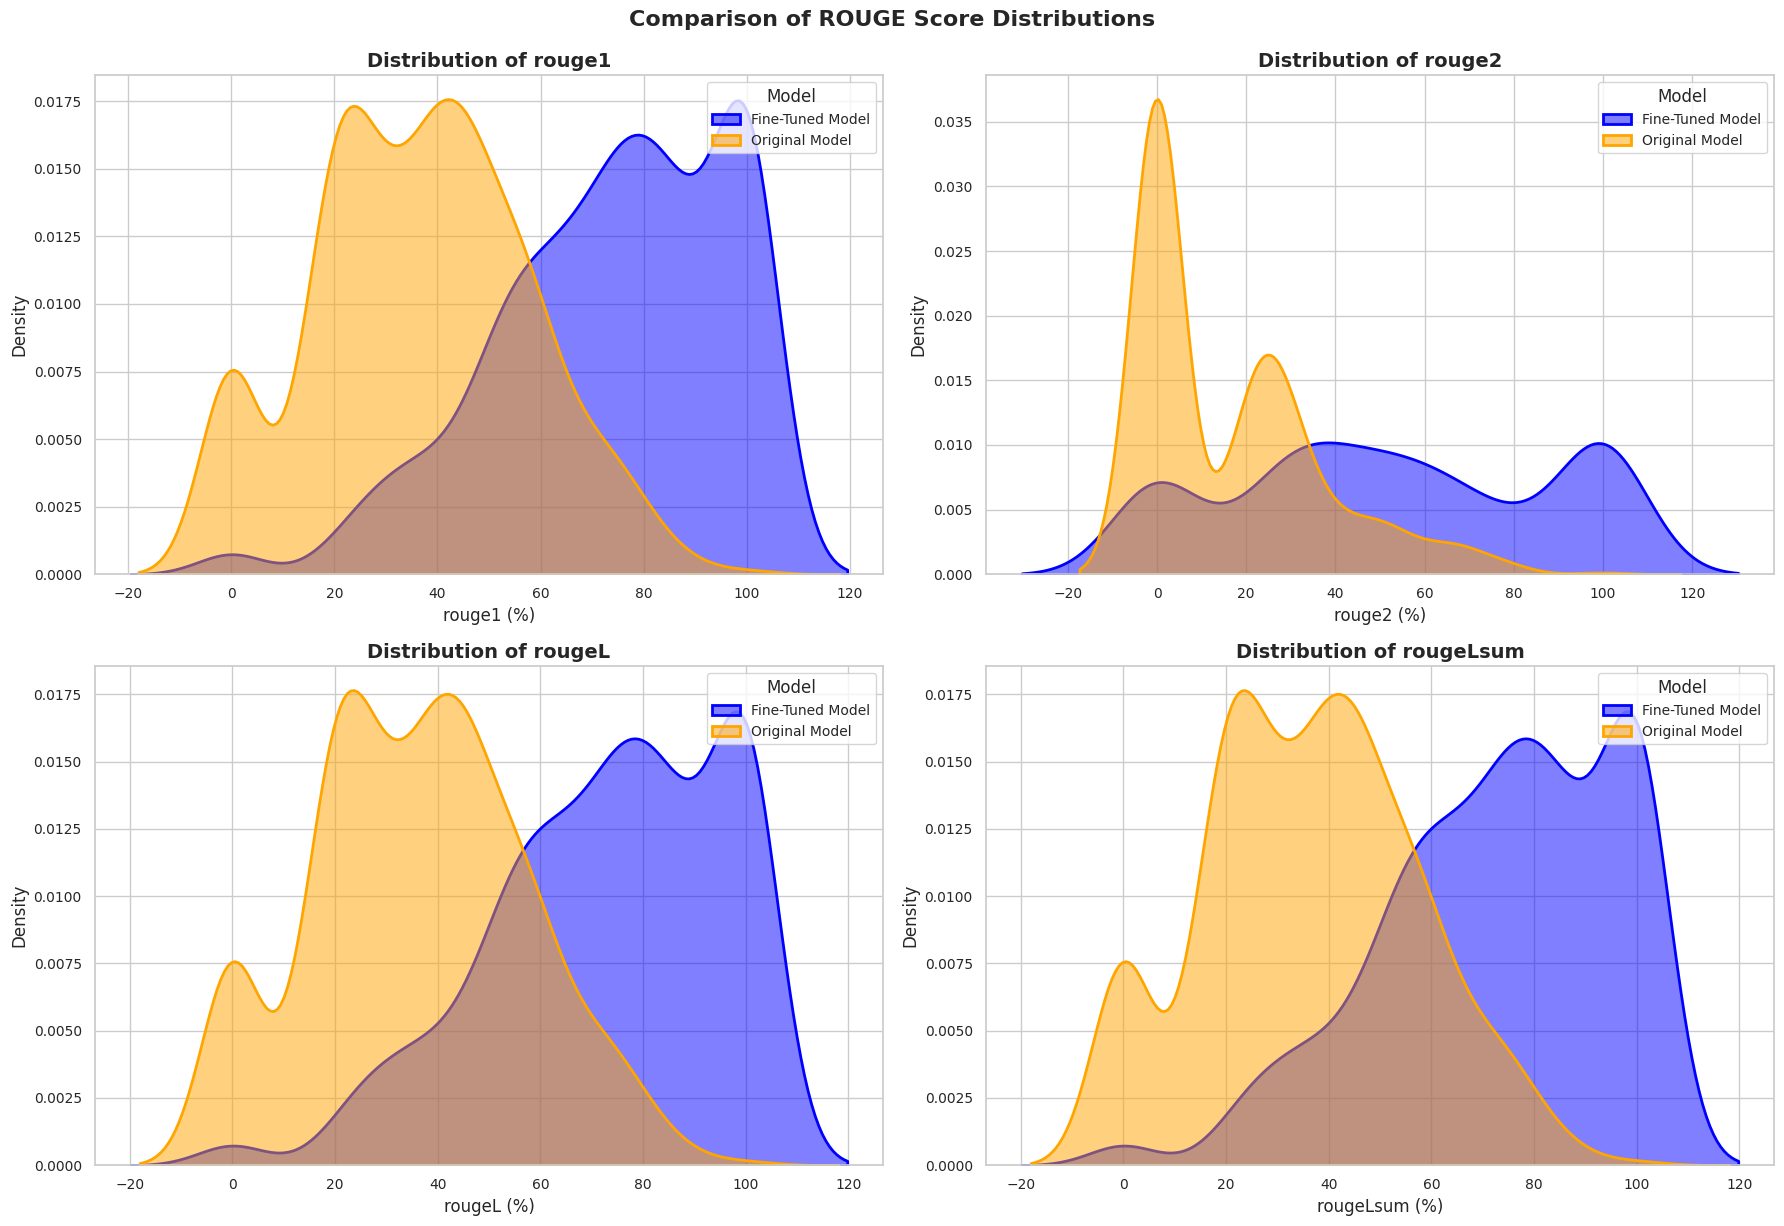

In [6]:
def plot_scores_distribution(data, score_columns):
    """
    Plots the distribution of ROUGE scores for rows where checkpoint_name is either 'checkpoint-99855' or 'query-gen-msmarco-t5-base-v1'.

    Parameters:
        data (DataFrame): The dataset containing ROUGE scores.
        score_columns (list): List of column names for ROUGE scores.

    Returns:
        None: Displays the plots.
    """
    # Filter data for each checkpoint_name
    fine_tuned_data = data[data['checkpoint_name'] == 'checkpoint-99855']
    original_data = data[data['checkpoint_name'] == 'query-gen-msmarco-t5-base-v1']

    # Set up the overall style and aesthetics
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(18, 12))
    
    # Iterate over each ROUGE score column to create a subplot
    for i, score in enumerate(score_columns, 1):
        plt.subplot(2, 2, i)
        sns.kdeplot(fine_tuned_data[score], fill=True, color='blue', alpha=0.5, label='Fine-Tuned Model', linewidth=2)
        sns.kdeplot(original_data[score], fill=True, color='orange', alpha=0.5, label='Original Model', linewidth=2)
        plt.title(f'Distribution of {score}', fontsize=14, fontweight='bold')
        plt.xlabel(f'{score} (%)', fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.legend(fontsize=10, title="Model", title_fontsize=12, loc='upper right')
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.suptitle('Comparison of ROUGE Score Distributions', fontsize=16, fontweight='bold', y=1.02)
    plt.show()

# Example usage
score_columns = ['rouge1', 'rouge2', 'rougeL', 'rougeLsum']
plot_scores_distribution(results, score_columns)


In [7]:
results.head()

,description,target_query,checkpoint_name,generated_output,rouge1,rouge2,rougeL,rougeLsum
0,"{'keywords': ['Amberta', '18K Gold Plated', 'S...",Amberta Gold Plated Figaro Chain Necklace,checkpoint-99855,Amberta Figaro Chain Necklace,80.00,50.00,80.00,80.00
1,"{'keywords': ['Amberta', '18K Gold Plated', 'S...",Amberta Gold Plated Figaro Chain Necklace,query-gen-msmarco-t5-base-v1,what is figaro chain,40.00,25.00,40.00,40.00
2,"{'keywords': ['FitFlop, sandals, Lulu, python ...",FitFlop Lulu Python Flip-Flop,checkpoint-99855,FitFlop Women's Lulu Flip-Flop,72.73,22.22,72.73,72.73
3,"{'keywords': ['FitFlop, sandals, Lulu, python ...",FitFlop Lulu Python Flip-Flop,query-gen-msmarco-t5-base-v1,what is lulu python print,40.00,25.00,40.00,40.00
4,"{'keywords': ['Clarks', ""women's slippers"", 'w...",Clarks Women's Wool Felt House Slippers,checkpoint-99855,Clarks Women's Slippers,72.73,44.44,72.73,72.73


In [8]:
results.dropna(inplace=True)

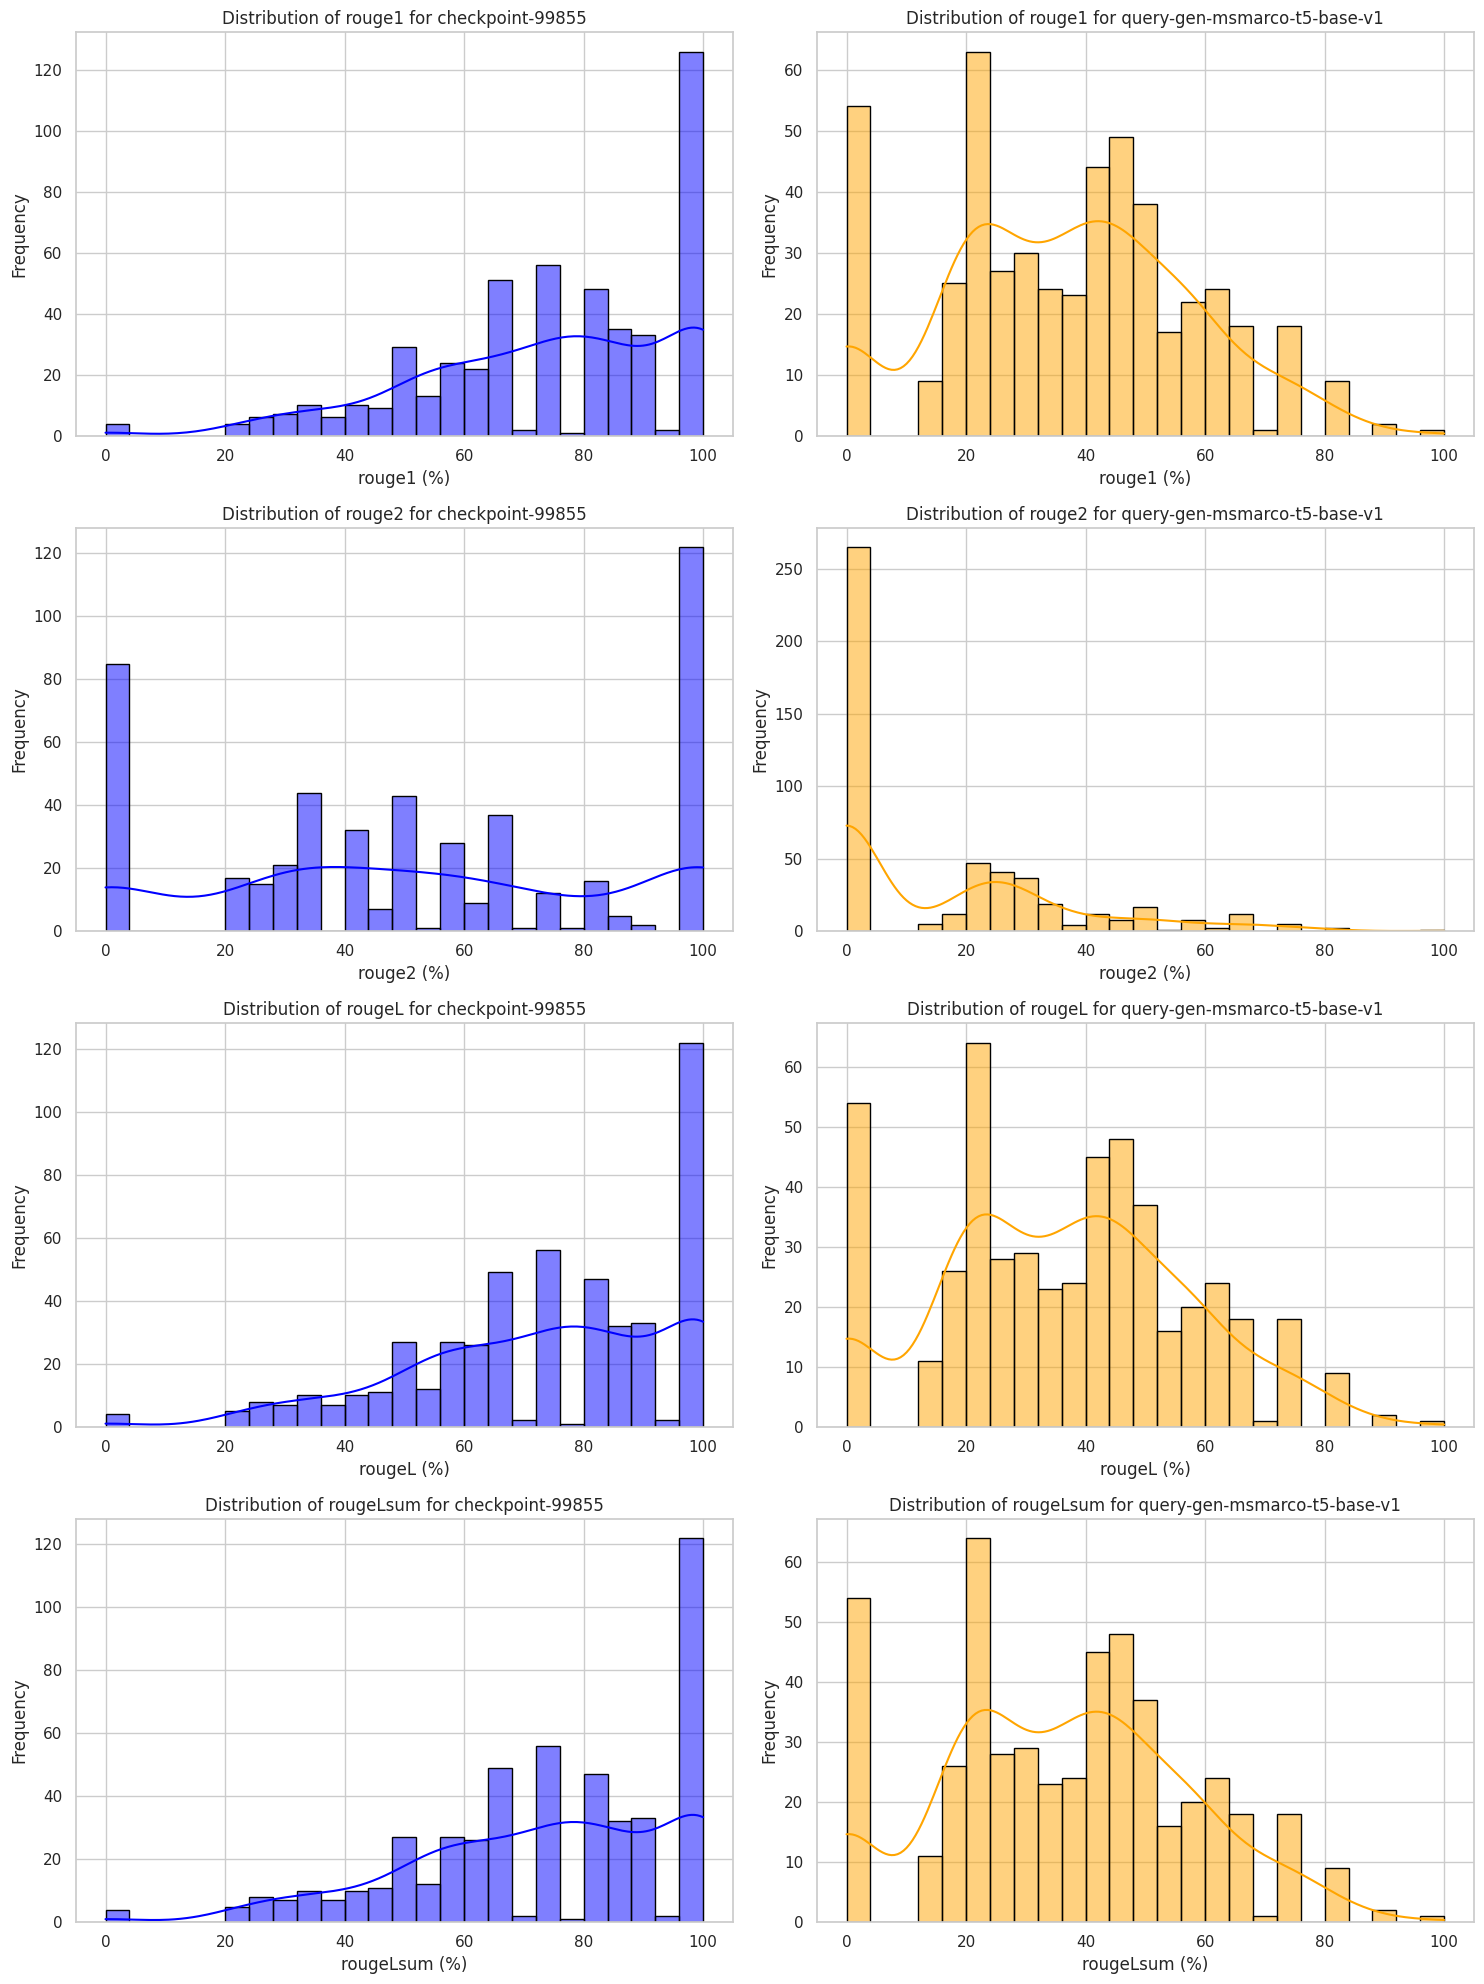

In [9]:
def plot_scores_distribution(data, score_columns):
    """
    Plots the distribution of ROUGE scores for rows where checkpoint_name is either 'checkpoint-99855' or 'query-gen-msmarco-t5-base-v1'.

    Parameters:
        data (DataFrame): The dataset containing ROUGE scores.
        score_columns (list): List of column names for ROUGE scores.

    Returns:
        None: Displays the plots.
    """
    # Filter data for each checkpoint_name
    fine_tuned_data = data[data['checkpoint_name'] == 'checkpoint-99855']
    original_data = data[data['checkpoint_name'] == 'query-gen-msmarco-t5-base-v1']

    plt.figure(figsize=(15, 20))
    
    # Iterate over each ROUGE score column to create subplots for both models
    for i, score in enumerate(score_columns, 1):
        plt.subplot(4, 2, 2 * i - 1)
        sns.histplot(fine_tuned_data[score], kde=True, bins=25, color='blue', edgecolor='black')
        plt.title(f'Distribution of {score} for checkpoint-99855')
        plt.xlabel(f'{score} (%)')
        plt.ylabel('Frequency')

        plt.subplot(4, 2, 2 * i)
        sns.histplot(original_data[score], kde=True, bins=25, color='orange', edgecolor='black')
        plt.title(f'Distribution of {score} for query-gen-msmarco-t5-base-v1')
        plt.xlabel(f'{score} (%)')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Example usage
score_columns = ['rouge1', 'rouge2', 'rougeL', 'rougeLsum']
plot_scores_distribution(results, score_columns)


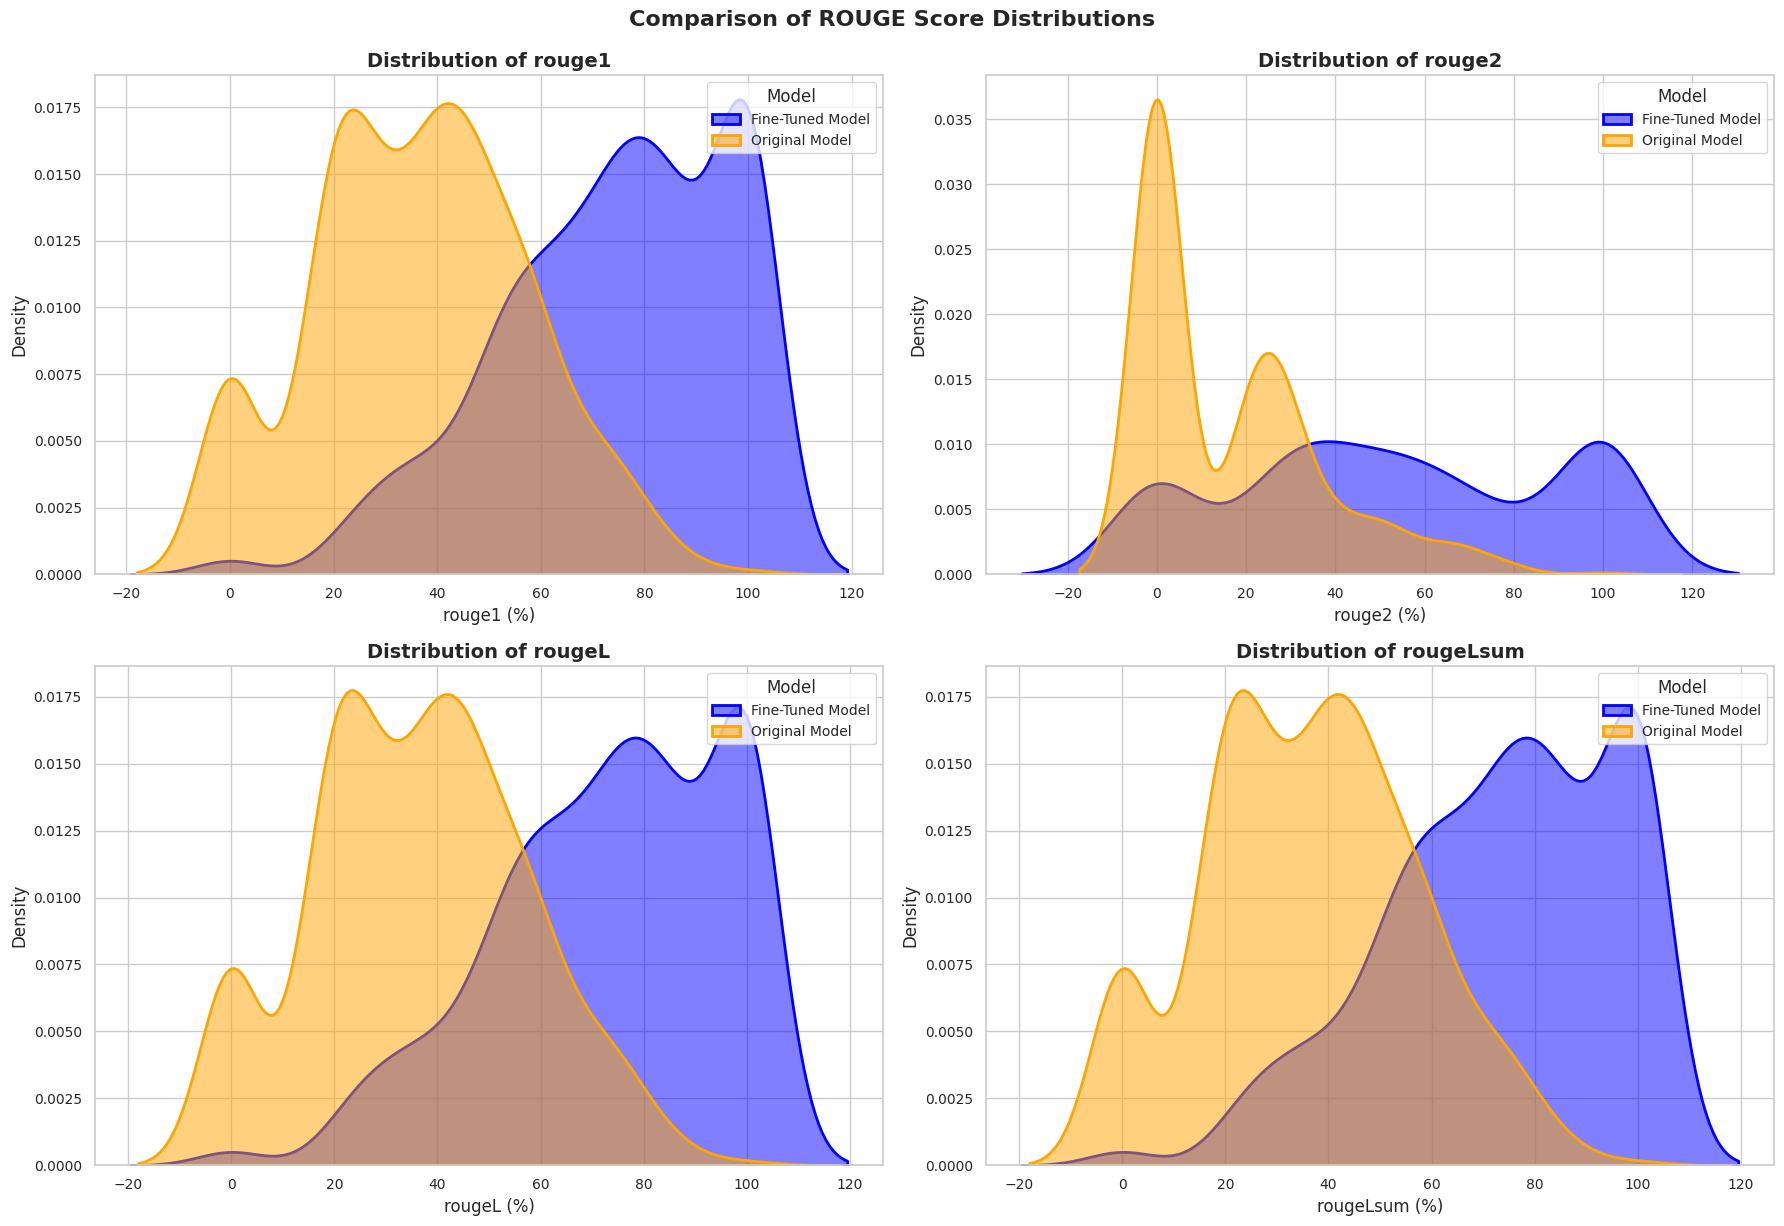

In [11]:
def plot_scores_distribution(data, score_columns):
    """
    Plots the distribution of ROUGE scores for rows where checkpoint_name is either 'checkpoint-99855' or 'query-gen-msmarco-t5-base-v1'.

    Parameters:
        data (DataFrame): The dataset containing ROUGE scores.
        score_columns (list): List of column names for ROUGE scores.

    Returns:
        None: Displays the plots.
    """
    # Filter data for each checkpoint_name
    fine_tuned_data = data[data['checkpoint_name'] == 'checkpoint-99855']
    original_data = data[data['checkpoint_name'] == 'query-gen-msmarco-t5-base-v1']

    # Set up the overall style and aesthetics
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(18, 12))
    
    # Iterate over each ROUGE score column to create a subplot
    for i, score in enumerate(score_columns, 1):
        plt.subplot(2, 2, i)
        sns.kdeplot(fine_tuned_data[score], fill=True, color='blue', alpha=0.5, label='Fine-Tuned Model', linewidth=2)
        sns.kdeplot(original_data[score], fill=True, color='orange', alpha=0.5, label='Original Model', linewidth=2)
        plt.title(f'Distribution of {score}', fontsize=14, fontweight='bold')
        plt.xlabel(f'{score} (%)', fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.legend(fontsize=10, title="Model", title_fontsize=12, loc='upper right')
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.suptitle('Comparison of ROUGE Score Distributions', fontsize=16, fontweight='bold', y=1.02)
    plt.show()

# Example usage
score_columns = ['rouge1', 'rouge2', 'rougeL', 'rougeLsum']
plot_scores_distribution(results, score_columns)


In [12]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   description       996 non-null    object 
 1   target_query      996 non-null    object 
 2   checkpoint_name   996 non-null    object 
 3   generated_output  996 non-null    object 
 4   rouge1            996 non-null    float64
 5   rouge2            996 non-null    float64
 6   rougeL            996 non-null    float64
 7   rougeLsum         996 non-null    float64
dtypes: float64(4), object(4)
memory usage: 70.0+ KB


In [13]:
zero_scores_df = results[(results['rouge1'] == 0) & (results['rouge2'] == 0) & (results['rougeLsum'] == 0) & (results['rougeL'] == 0) & (results['checkpoint_name'] == 'checkpoint-99855'	)]
zero_scores_df

,description,target_query,checkpoint_name,generated_output,rouge1,rouge2,rougeL,rougeLsum
356,"{'keywords': ['sinkers, fishing, surf weights'...",surf sinkers,checkpoint-99855,Breakaway Super Sinker 3oz,0.0,0.0,0.0,0.0
594,"{'keywords': ['poncho, blanket, outdoor, nylon...",wearable blanket,checkpoint-99855,hooded poncho,0.0,0.0,0.0,0.0
618,"{'keywords': ['keychain, lanyard, wrist access...",Bulopur Keychains,checkpoint-99855,leopard print wrist keychain,0.0,0.0,0.0,0.0
630,"{'keywords': ['jogger, twill, cotton, olive gr...",Nollie Solid Twill Jogger,checkpoint-99855,AKADEMIKS Men's Joggers,0.0,0.0,0.0,0.0


In [47]:
# Filter the DataFrame for both checkpoint names
df_checkpoint_1 = results[results['checkpoint_name'] == 'query-gen-msmarco-t5-base-v1']
df_checkpoint_2 = results[results['checkpoint_name'] == 'checkpoint-99855']

# Merge the two DataFrames on 'description' to compare the scores
merged_df = pd.merge(df_checkpoint_1[['description', 'target_query', 'generated_output', 'rouge1', 'rouge2', 'rougeLsum']],
                     df_checkpoint_2[['description', 'target_query', 'generated_output', 'rouge1', 'rouge2', 'rougeLsum']],
                     on='description',
                     suffixes=('_query-gen', '_checkpoint-99855'))

# Now, filter where the 'query-gen' scores are better than the 'checkpoint-99855' scores
better_results_df = merged_df[
    (merged_df['rouge1_query-gen'] > merged_df['rouge1_checkpoint-99855']) &
    (merged_df['rouge2_query-gen'] > merged_df['rouge2_checkpoint-99855']) &
    (merged_df['rougeLsum_query-gen'] > merged_df['rougeLsum_checkpoint-99855'])
]

# Print the rows where the 'query-gen' checkpoint had better results
better_results_df[['description',  'target_query_checkpoint-99855','generated_output_query-gen', 
                         'generated_output_checkpoint-99855',
                         ]]

new_df = better_results_df[['description',  'target_query_checkpoint-99855','generated_output_query-gen', 
                         'generated_output_checkpoint-99855',
                         ]]
new_df.to_csv("better_query_gen.csv")

In [60]:
best = results[(results['rougeL'] >= 50) & (results['checkpoint_name'] == 'checkpoint-99855')]
best 

,description,target_query,checkpoint_name,generated_output,rouge1,rouge2,rougeL,rougeLsum
6,Knee length velvet dress with a lace trim piec...,pink cold shoulder velvet dress,checkpoint-99855,velvet cold shoulder dress,88.89,28.57,66.67,66.67
8,Pandora Silver Freshwater Pearl And Cz Ring In...,Pandora Pearl CZ Ring,checkpoint-99855,Pandora Freshwater Pearl Cz Ring,88.89,57.14,88.89,88.89
10,Features of the Personalized Name Necklace:\nM...,custom name necklace,checkpoint-99855,personalized name necklace,66.67,50.00,66.67,66.67
14,Super absorbent film to remove oil from deep w...,Gatsby Blotting Film,checkpoint-99855,Gatsby Blotting Film,100.00,100.00,100.00,100.00
18,NCAA Authentic USC Trojans Adjustable Hat from...,USC Trojans Hat,checkpoint-99855,USC Trojans Adjustable Hat,85.71,40.00,85.71,85.71
...,...,...,...,...,...,...,...,...
50700,Get ready for the glowy skin you've always wan...,Maybelline Dream Radiant Liquid Foundation,checkpoint-99855,L'Oreal Dream Radiant Liquid Foundation,72.73,66.67,72.73,72.73
50708,This three pair pack of lightweight ultra-dri ...,Wrangler Men's Boot Socks,checkpoint-99855,Dr. Scholl's boot socks,60.00,50.00,60.00,60.00
50712,Sporty runner with perf detailing to allow you...,Cole Haan Men's Perforated Runner,checkpoint-99855,Cole Haan Women's Running Shoe,50.00,20.00,50.00,50.00
50714,3/4 Batwing Sleeve Loose Lightweight Chiffon C...,Lightweight Chiffon Kimono Cardigan,checkpoint-99855,lightweight chiffon kimono,85.71,80.00,85.71,85.71


In [53]:
best.to_csv("top50.csv")

In [ ]:
worst = results[(results['rougeL'] == 0)]
worst 